# Turtle Rescue Forecast Challenge


* Link:
[Turtle Rescue Forecast Challenge](https://zindi.africa/competitions/turtle-rescue-forecast-challenge/data)

* Objective: The objective of this challenge is to forecast the number of turtles caught per week per capture site. This will help Local Ocean plan their staff schedules and budget.

| Variable             | Description                                                                                                                                               |
|----------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------|
| Rescue_ID            | It’s an individual bycatch incidence identity number. The numbers are consecutive, for each year e.g. 2018_RE_0732 means rescue number 732 in year 2018 | 
| Date_TimeCaught      | Date the turtle is captured e.g. 06/01/ |2018                                                                                                                |
| Researcher           | Name of bycatch officer(s) involved with specific rescue                                                                                                   |
| Capture Site         | Area where turtle was captured, as reported by the fisher.                                                                                                 |
| Foraging Ground      | General area of ocean area where turtle was captured. The assumption is that the turtle was foraging where it was captured.                               |
| Capture Method       | Fishing gear or method used by fishers to capture the turtle                                                                                               |
| Fisher               | Name of the fisher who captured the turtle                                                                                                                 |
| Landing_Site         | Section of beach where turtle is landed.                                                                                                                  |
| Species              | Species of turtle (e.g. green turtle, hawksbill, loggerhead etc.)                                                                                          |
| Tag_1                | Individual / unique number used to identify a turtle. Each turtle that is captured is tagged.                                                            |
| Tag_2                | Second tag added to large turtles. Turtles with two tags: tag 1 is an odd number e.g. KEL0169 and tag 2 is even and consequent e.g. KEL0170                |
| Lost_Tags            | Replaced tags. If a turtle has outgrown its tag, the tag is removed and replaced with a bigger one, with a different number                              |
| T_Number             | It a number given to a turtle that has been taken to the rehabilitation facility (TRC) for treatment.                                                    |
| CCL_cm               | Central Carapace Length (Biometric measurement). Measured in centimetres                                                                                  |
| CCW_cm               | Central Carapace Width (Biometric measurement). Measured in centimetres                                                                                    |
| Weight_Kg            | (Biometric measurement). Measured in Kgs                                                                                                                   |
| Sex                  | Gender of the turtle.                                                                                                                                     |
| Turtle Characteristics | Description of turtles (mostly unusual occurrences e.g. disease, injury, parasites etc. Usually as short textual description                               |
| Status               | Indicates whether the turtle is released or admitted to TRC                                                                                                |
| Release Site         | Site where the turtle is released                                                                                                                          |
| Date_Release         | Date turtle is released                                                                                                                                    |
| Release_Admiss_Notes | Additional information about release                                                                                                                      |
| SpecialRemarks       | Additional info (General) about turtle                                                                                                                     |


## Set-up and Import

Terminal: 
'make setup'

In [69]:
#!pip install ydata_profiling
#!pip install missingno

In [70]:
#!pip freeze > requirements.txt

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from ydata_profiling import ProfileReport

import missingno as msno




In [72]:
#! pip install ydata-profiling --upgrade

## Table 1: capturesite_category

In [73]:
# Turtles dataset - CaptureSite_category.csv
df_capturesite_category = pd.read_csv('./data/CaptureSite_category.csv')
df_capturesite_category.head()

,CaptureSite,CaptureSiteCategory,Type
0,CaptureSite_0,CaptureSiteCategory_2,Type_1
1,CaptureSite_1,CaptureSiteCategory_2,Type_1
2,CaptureSite_10,CaptureSiteCategory_2,Type_1
3,CaptureSite_11,CaptureSiteCategory_0,Type_0
4,CaptureSite_12,CaptureSiteCategory_2,Type_1


In [74]:
df_capturesite_category.shape

(29, 3)

In [75]:
# Different categories of CaptureSite
df_capturesite_category['CaptureSite'].unique()


array(['CaptureSite_0', 'CaptureSite_1', 'CaptureSite_10',
       'CaptureSite_11', 'CaptureSite_12', 'CaptureSite_13',
       'CaptureSite_14', 'CaptureSite_15', 'CaptureSite_16',
       'CaptureSite_17', 'CaptureSite_18', 'CaptureSite_19',
       'CaptureSite_2', 'CaptureSite_20', 'CaptureSite_21',
       'CaptureSite_22', 'CaptureSite_23', 'CaptureSite_24',
       'CaptureSite_25', 'CaptureSite_26', 'CaptureSite_27',
       'CaptureSite_28', 'CaptureSite_3', 'CaptureSite_4',
       'CaptureSite_5', 'CaptureSite_6', 'CaptureSite_7', 'CaptureSite_8',
       'CaptureSite_9'], dtype=object)

In [76]:
print('Classification of CaptureSite categories: ', len(df_capturesite_category['CaptureSite'].unique()))


Classification of CaptureSite categories:  29


In [77]:
df_capturesite_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CaptureSite          29 non-null     object
 1   CaptureSiteCategory  29 non-null     object
 2   Type                 29 non-null     object
dtypes: object(3)
memory usage: 828.0+ bytes


## Table 2: sample

In [78]:
# Turtles dataset - Sample_sub.csv
df_sample_sub = pd.read_csv('./data/Sample_sub.csv')
df_sample_sub.head()

,ID,Capture_Number
0,CaptureSite_0_201901,7
1,CaptureSite_0_201902,1
2,CaptureSite_0_201903,5
3,CaptureSite_0_201904,2
4,CaptureSite_0_201905,3


In [79]:
df_sample_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              1276 non-null   object
 1   Capture_Number  1276 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.1+ KB


## Table 3: train

In [80]:
# Turtles dataset - train.csv
df_train = pd.read_csv('./data/train.csv')
df_train.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,NaN,NaN,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,NaN,NaN,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,NaN,NaN,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,NaN,NaN,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,NaN,NaN,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02


In [81]:
df_train.tail()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease
18057,2018_RE_1511,2018-12-18,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_569,LandingSite_CaptureSiteCategory_1,Species_5,KES1828,...,NaN,NaN,57.13,50.57,21.09,Unknown,White calcareous algae on carapace,Released,ReleaseSite_68,18/12/18
18058,2018_RE_1514,2018-12-18,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_125,LandingSite_CaptureSiteCategory_1,Species_6,KES0563,...,KES0416,NaN,42.07,38.37,9.02,Unknown,Calcareous + green algae on carapace\nBarnacle...,Released,ReleaseSite_68,18/12/18
18059,2018_RE_1532,2018-12-24,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_1343,LandingSite_CaptureSiteCategory_1,Species_5,KES1833,...,NaN,NaN,57.20,52.30,NaN,Unknown,Clean turtle,Released,ReleaseSite_68,24/12/18
18060,2018_RE_1533,2018-12-24,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_1551,LandingSite_CaptureSiteCategory_1,Species_5,KES1831,...,NaN,NaN,51.90,48.50,NaN,Unknown,Green algae on carapace\ntip of left supra mis...,Released,ReleaseSite_68,24/12/18
18061,2018_RE_1550,2018-12-28,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_1551,LandingSite_CaptureSiteCategory_1,Species_6,KES1432,...,NaN,NaN,34.60,31.20,4.29,Unknown,Thick pink patches of calcareous algae on cara...,Released,ReleaseSite_37,28/12/18


In [82]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18062 entries, 0 to 18061
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rescue_ID              18062 non-null  object 
 1   Date_TimeCaught        18062 non-null  object 
 2   Researcher             18062 non-null  object 
 3   CaptureSite            18062 non-null  object 
 4   ForagingGround         18062 non-null  object 
 5   CaptureMethod          18062 non-null  object 
 6   Fisher                 18062 non-null  object 
 7   LandingSite            18062 non-null  object 
 8   Species                18062 non-null  object 
 9   Tag_1                  17937 non-null  object 
 10  Tag_2                  4911 non-null   object 
 11  Lost_Tags              925 non-null    object 
 12  T_Number               38 non-null     object 
 13  CCL_cm                 18038 non-null  float64
 14  CCW_cm                 18035 non-null  float64
 15  We

## Preprocessing

In [83]:
# Merge table df_train and df_capturesite_categoryn on 'CaptureSite'

df_train = pd.merge(df_train, df_capturesite_category, on='CaptureSite', how='left')
df_train.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,CaptureSiteCategory,Type
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00,CaptureSiteCategory_2,Type_1
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01,CaptureSiteCategory_2,Type_1
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01,CaptureSiteCategory_2,Type_1
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02,CaptureSiteCategory_2,Type_1
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02,CaptureSiteCategory_2,Type_1


<Axes: >

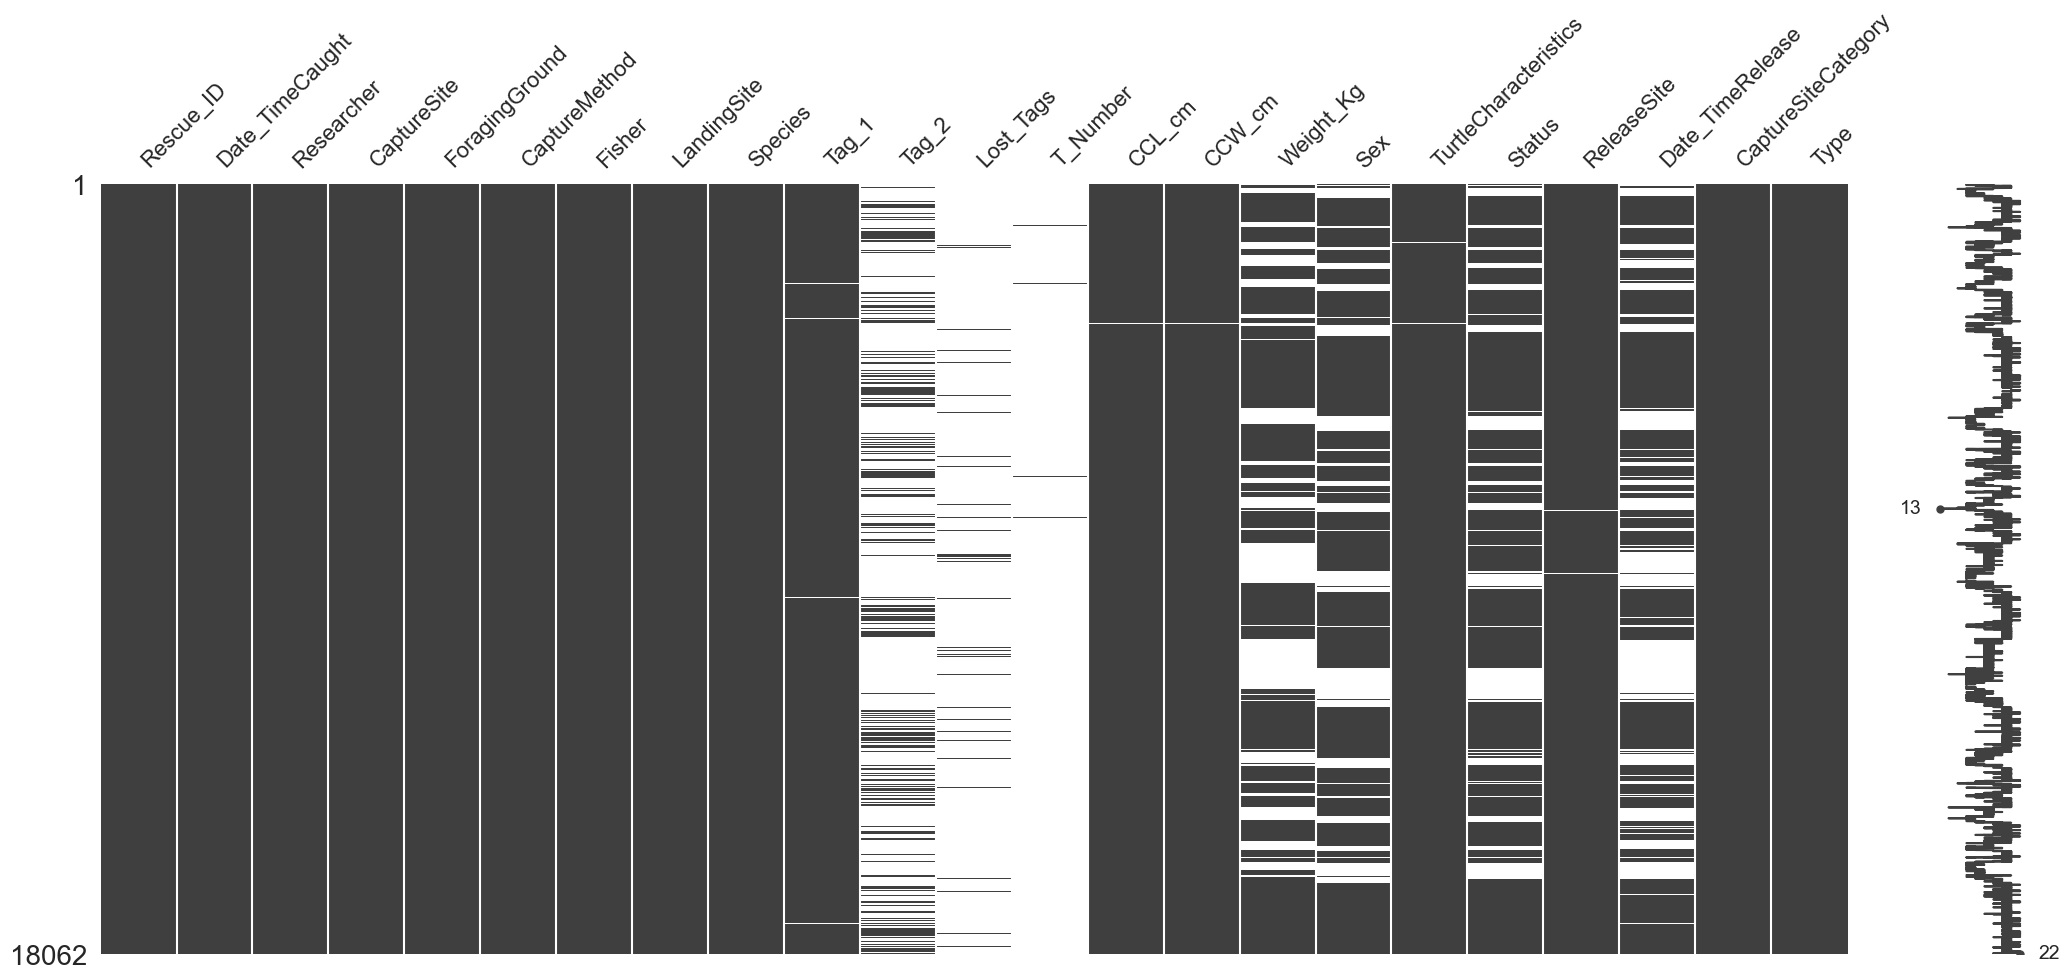

In [84]:
msno.matrix(df_train)

## Dropping columns with too many missing values: t_number, tag2, lost_tags

In [85]:
# Drop columns 'CaptureSite' and 'CaptureSite_category'
df_train = df_train.drop(['T_Number', 'Lost_Tags', 'Tag_2'], axis=1)
df_train.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,CaptureSiteCategory,Type
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00,CaptureSiteCategory_2,Type_1
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01,CaptureSiteCategory_2,Type_1
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01,CaptureSiteCategory_2,Type_1
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02,CaptureSiteCategory_2,Type_1
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02,CaptureSiteCategory_2,Type_1


## Transform date to datetime format

In [86]:
# Transform 'Date_TimeCaught' column to datetime format
df_train['Date_TimeCaught'] = pd.to_datetime(df_train['Date_TimeCaught'])

#create new columns for year and week of year, year_woy (year and week of year combined)
df_train["year"]=df_train.Date_TimeCaught.dt.year
df_train["week_of_year"]=df_train.Date_TimeCaught.dt.isocalendar().week
df_train["year_woy"]=df_train.year*100+df_train.week_of_year

df_train.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,CaptureSiteCategory,Type,year,week_of_year,year_woy
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00,CaptureSiteCategory_2,Type_1,2000,51,200051
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01,CaptureSiteCategory_2,Type_1,2001,43,200143
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,Unknown,clean,Released,ReleaseSite_50,01/11/01,CaptureSiteCategory_2,Type_1,2001,44,200144
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02,CaptureSiteCategory_2,Type_1,2002,11,200211
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02,CaptureSiteCategory_2,Type_1,2002,32,200232


In [87]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18062 entries, 0 to 18061
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rescue_ID              18062 non-null  object        
 1   Date_TimeCaught        18062 non-null  datetime64[ns]
 2   Researcher             18062 non-null  object        
 3   CaptureSite            18062 non-null  object        
 4   ForagingGround         18062 non-null  object        
 5   CaptureMethod          18062 non-null  object        
 6   Fisher                 18062 non-null  object        
 7   LandingSite            18062 non-null  object        
 8   Species                18062 non-null  object        
 9   Tag_1                  17937 non-null  object        
 10  CCL_cm                 18038 non-null  float64       
 11  CCW_cm                 18035 non-null  float64       
 12  Weight_Kg              12653 non-null  float64       
 13  S

## separate srtings_numbers ??

## Group by week and capturesite

In [88]:
# groupby year/ capture site  
df_train.groupby(['year_woy', 'CaptureSite'])
df_train.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,CaptureSiteCategory,Type,year,week_of_year,year_woy
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00,CaptureSiteCategory_2,Type_1,2000,51,200051
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01,CaptureSiteCategory_2,Type_1,2001,43,200143
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,Unknown,clean,Released,ReleaseSite_50,01/11/01,CaptureSiteCategory_2,Type_1,2001,44,200144
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02,CaptureSiteCategory_2,Type_1,2002,11,200211
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02,CaptureSiteCategory_2,Type_1,2002,32,200232


## Define the target

In [89]:
# Grouping and counting
Target=df_train.groupby(["year_woy","CaptureSite"]).CaptureSite.count().rename("Number_Turtles").reset_index()

df_train.head()


,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,CaptureSiteCategory,Type,year,week_of_year,year_woy
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00,CaptureSiteCategory_2,Type_1,2000,51,200051
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01,CaptureSiteCategory_2,Type_1,2001,43,200143
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,Unknown,clean,Released,ReleaseSite_50,01/11/01,CaptureSiteCategory_2,Type_1,2001,44,200144
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02,CaptureSiteCategory_2,Type_1,2002,11,200211
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02,CaptureSiteCategory_2,Type_1,2002,32,200232


In [90]:
Target.head()

,year_woy,CaptureSite,Number_Turtles
0,199816,CaptureSite_27,1
1,199828,CaptureSite_11,1
2,199832,CaptureSite_11,1
3,199832,CaptureSite_27,1
4,199839,CaptureSite_11,2


In [91]:
# Merge table df_train and df_capturesite_categoryn on 'CaptureSite'

df_train_final = pd.merge(df_train, Target, on=['year_woy', 'CaptureSite'], how='left')
df_train_final.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,CaptureSiteCategory,Type,year,week_of_year,year_woy,Number_Turtles
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,algae at rear of shell,Released,ReleaseSite_50,22/12/00,CaptureSiteCategory_2,Type_1,2000,51,200051,1
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01,CaptureSiteCategory_2,Type_1,2001,43,200143,1
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,clean,Released,ReleaseSite_50,01/11/01,CaptureSiteCategory_2,Type_1,2001,44,200144,1
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02,CaptureSiteCategory_2,Type_1,2002,11,200211,1
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02,CaptureSiteCategory_2,Type_1,2002,32,200232,2


In [92]:
df_train_final.columns

Index(['Rescue_ID', 'Date_TimeCaught', 'Researcher', 'CaptureSite',
       'ForagingGround', 'CaptureMethod', 'Fisher', 'LandingSite', 'Species',
       'Tag_1', 'CCL_cm', 'CCW_cm', 'Weight_Kg', 'Sex',
       'TurtleCharacteristics', 'Status', 'ReleaseSite', 'Date_TimeRelease',
       'CaptureSiteCategory', 'Type', 'year', 'week_of_year', 'year_woy',
       'Number_Turtles'],
      dtype='object')

In [93]:
df_train_final.shape

(18062, 24)

<Axes: >

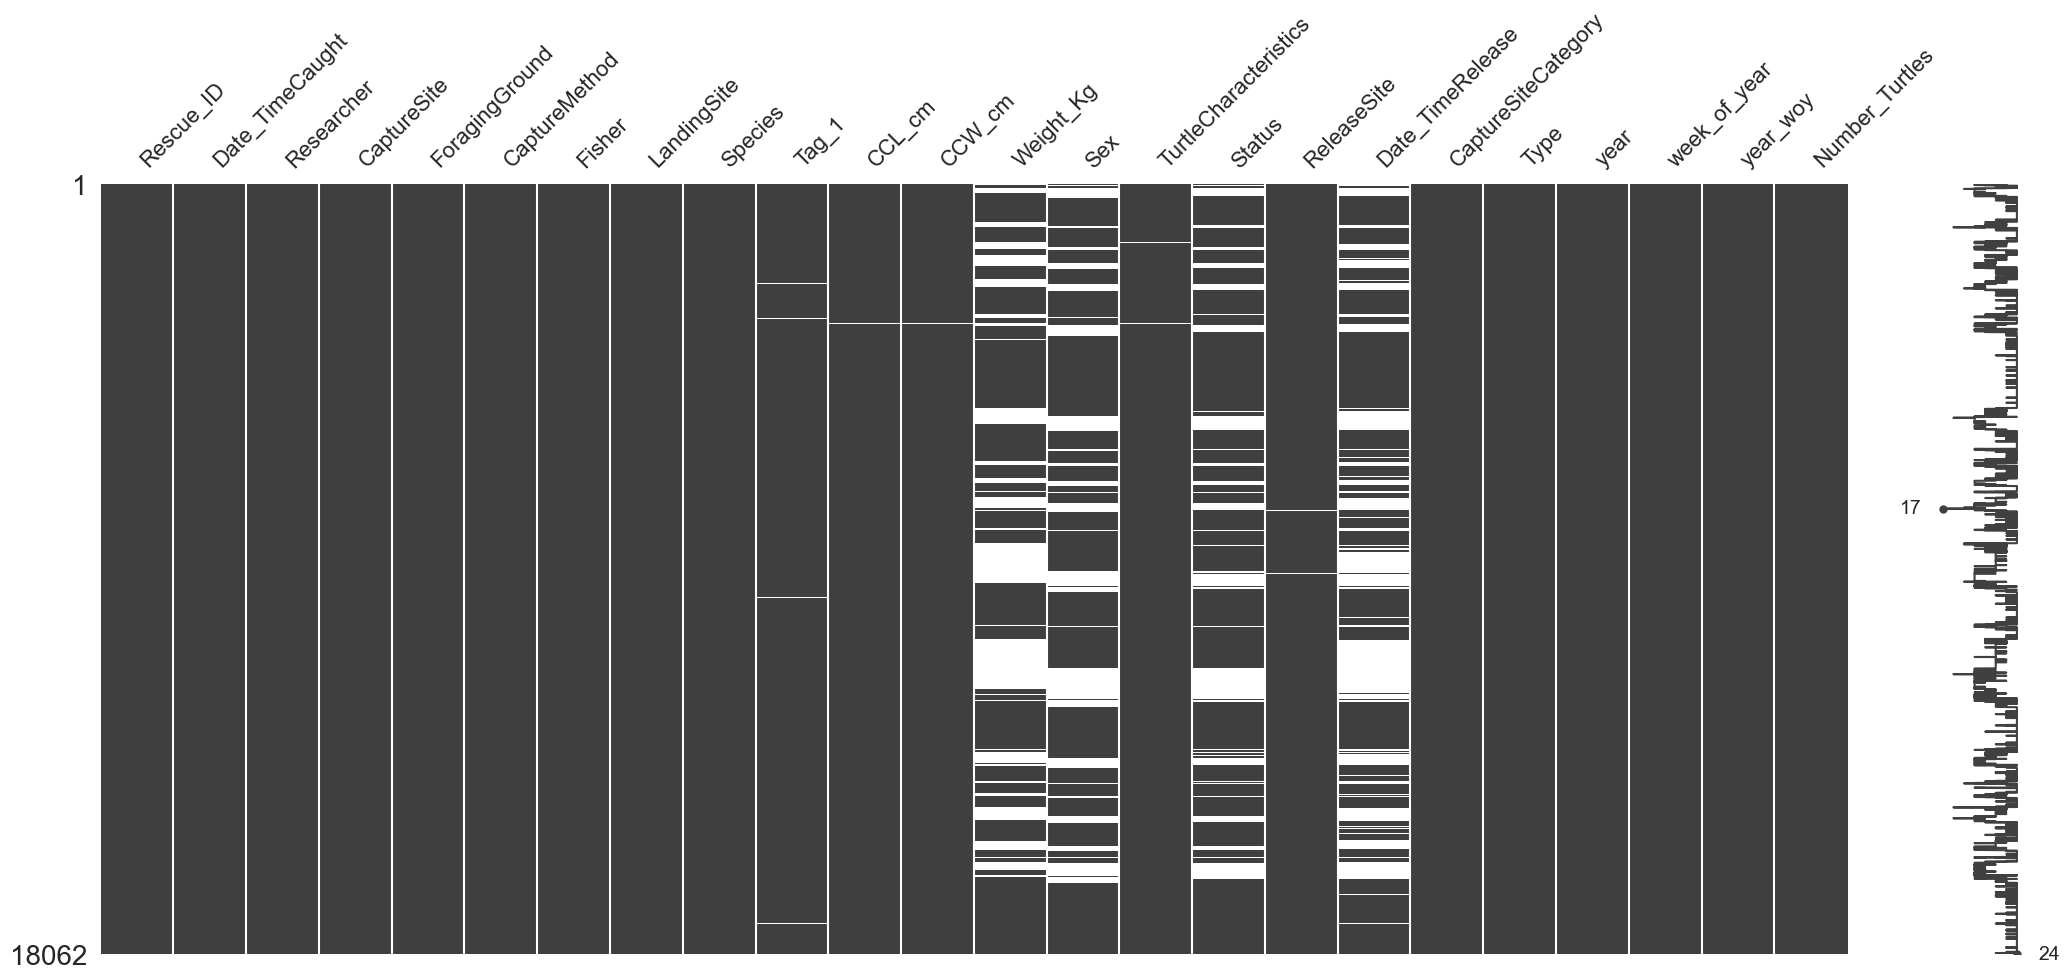

In [94]:
msno.matrix(df_train_final)

#### dropping columns with too many unique values before one hot encoding
**! I dropped Date_TimeCaught because RandomForestRegressor cannot deal with datetime format !**

In [95]:
#dropping unneccesary columns 
df_final = df_train_final.drop(['Rescue_ID', 'Researcher', 'Fisher','Tag_1','TurtleCharacteristics', 'ReleaseSite', 'Date_TimeRelease', 'Date_TimeCaught'], axis=1)

In [96]:
df_final.head()

,CaptureSite,ForagingGround,CaptureMethod,LandingSite,Species,CCL_cm,CCW_cm,Weight_Kg,Sex,Status,CaptureSiteCategory,Type,year,week_of_year,year_woy,Number_Turtles
0,CaptureSite_0,Ocean,Net,LandingSite_CaptureSiteCategory_2,Species_6,64.70,62.60,NaN,Unknown,Released,CaptureSiteCategory_2,Type_1,2000,51,200051,1
1,CaptureSite_0,Ocean,Net,LandingSite_CaptureSiteCategory_2,Species_6,35.85,31.35,NaN,Unknown,Released,CaptureSiteCategory_2,Type_1,2001,43,200143,1
2,CaptureSite_0,Ocean,Net,LandingSite_CaptureSiteCategory_2,Species_5,51.80,49.20,NaN,Unknown,Released,CaptureSiteCategory_2,Type_1,2001,44,200144,1
3,CaptureSite_0,Ocean,Net,LandingSite_CaptureSiteCategory_2,Species_6,60.50,59.00,NaN,Unknown,Released,CaptureSiteCategory_2,Type_1,2002,11,200211,1
4,CaptureSite_0,Ocean,Beached,LandingSite_CaptureSiteCategory_2,Species_5,34.70,33.00,NaN,Unknown,Released,CaptureSiteCategory_2,Type_1,2002,32,200232,2


In [97]:
df_final.dtypes


CaptureSite             object
ForagingGround          object
CaptureMethod           object
LandingSite             object
Species                 object
CCL_cm                 float64
CCW_cm                 float64
Weight_Kg              float64
Sex                     object
Status                  object
CaptureSiteCategory     object
Type                    object
year                     int32
week_of_year            UInt32
year_woy                 Int64
Number_Turtles           int64
dtype: object

## Split train-test

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [99]:
"""# Getting non-numerical features
features_not_numerical = ['Rescue_ID', 'Date_TimeCaught', 'Researcher', 'CaptureSite',
       'ForagingGround', 'CaptureMethod', 'Fisher', 'LandingSite', 'Species',
       'Tag_1', 'Sex',
       'TurtleCharacteristics', 'Status', 'ReleaseSite', 'Date_TimeRelease',
       'CaptureSiteCategory', 'Type', 'year', 'week_of_year', 'year_woy']"""

"# Getting non-numerical features\nfeatures_not_numerical = ['Rescue_ID', 'Date_TimeCaught', 'Researcher', 'CaptureSite',\n       'ForagingGround', 'CaptureMethod', 'Fisher', 'LandingSite', 'Species',\n       'Tag_1', 'Sex',\n       'TurtleCharacteristics', 'Status', 'ReleaseSite', 'Date_TimeRelease',\n       'CaptureSiteCategory', 'Type', 'year', 'week_of_year', 'year_woy']"

In [100]:
# Define features and target
X = df_final.drop(['Number_Turtles'], axis=1)

y = df_final['Number_Turtles']

In [101]:
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Fill missing values - Nan
for our RandomForestRegressor we need to fill the missing values
Missing Value Imputation: missing value imputation separately for both X_train and X_test

### X_train filling in missing values


In [102]:
#checking isnull values
X_train.isnull().sum()

CaptureSite               0
ForagingGround            0
CaptureMethod             0
LandingSite               0
Species                   0
CCL_cm                   20
CCW_cm                   22
Weight_Kg              4318
Sex                    3503
Status                 2939
CaptureSiteCategory       0
Type                      0
year                      0
week_of_year              0
year_woy                  0
dtype: int64

In [103]:
X_train.Weight_Kg.describe()

count    10131.000000
mean         9.833175
std          9.770500
min          0.020000
25%          5.000000
50%          7.460000
75%         10.740000
max        140.000000
Name: Weight_Kg, dtype: float64

In [104]:
#we have an outlier, so lets use the median to fill the missing values
X_train.Weight_Kg.fillna(X_train.Weight_Kg.median(), inplace=True)

In [105]:
X_train.Sex.value_counts()

Sex
Unknown         10826
Female             85
Male               33
Not_Recorded        2
Name: count, dtype: int64

In [106]:
#fill missing values of Sex with Unknown
X_train.Sex.fillna('Unknown', inplace=True)

In [107]:
X_train.Status.value_counts()

Status
Released                                    10858
Admitted                                      226
Not_Recorded                                   20
 green algae on carapace                        7
 no other major characteristics                 6
                                            ...  
 notch btw 9/10RMS & on 11RMS & 9LMS            1
 green algae on rear carapace                   1
 light flaking on shell& sm b on L supra        1
 small Bs on shoulder and 3rd CS                1
 tip of supras damaged                          1
Name: count, Length: 361, dtype: int64

In [108]:
X_train.Status.fillna('Not_Recorded', inplace=True)

In [109]:
# how to fill in for CCL_cm and CCW_cm? check median by species?
print(X_train.groupby('Species').CCL_cm.median())
print(X_train.groupby('Species').CCW_cm.median())

Species
Species_0    45.00
Species_1    60.55
Species_2    44.80
Species_3    38.50
Species_4    84.30
Species_5    43.90
Species_6    35.70
Species_7    54.70
Name: CCL_cm, dtype: float64
Species
Species_0    44.50
Species_1    43.25
Species_2    44.40
Species_3    35.80
Species_4    79.10
Species_5    41.80
Species_6    33.20
Species_7    57.30
Name: CCW_cm, dtype: float64


In [110]:
#then fill in missing values with median per species
X_train.CCL_cm.fillna(X_train.groupby('Species').CCL_cm.transform('median'), inplace=True)
X_train.CCW_cm.fillna(X_train.groupby('Species').CCW_cm.transform('median'), inplace=True)

<Axes: >

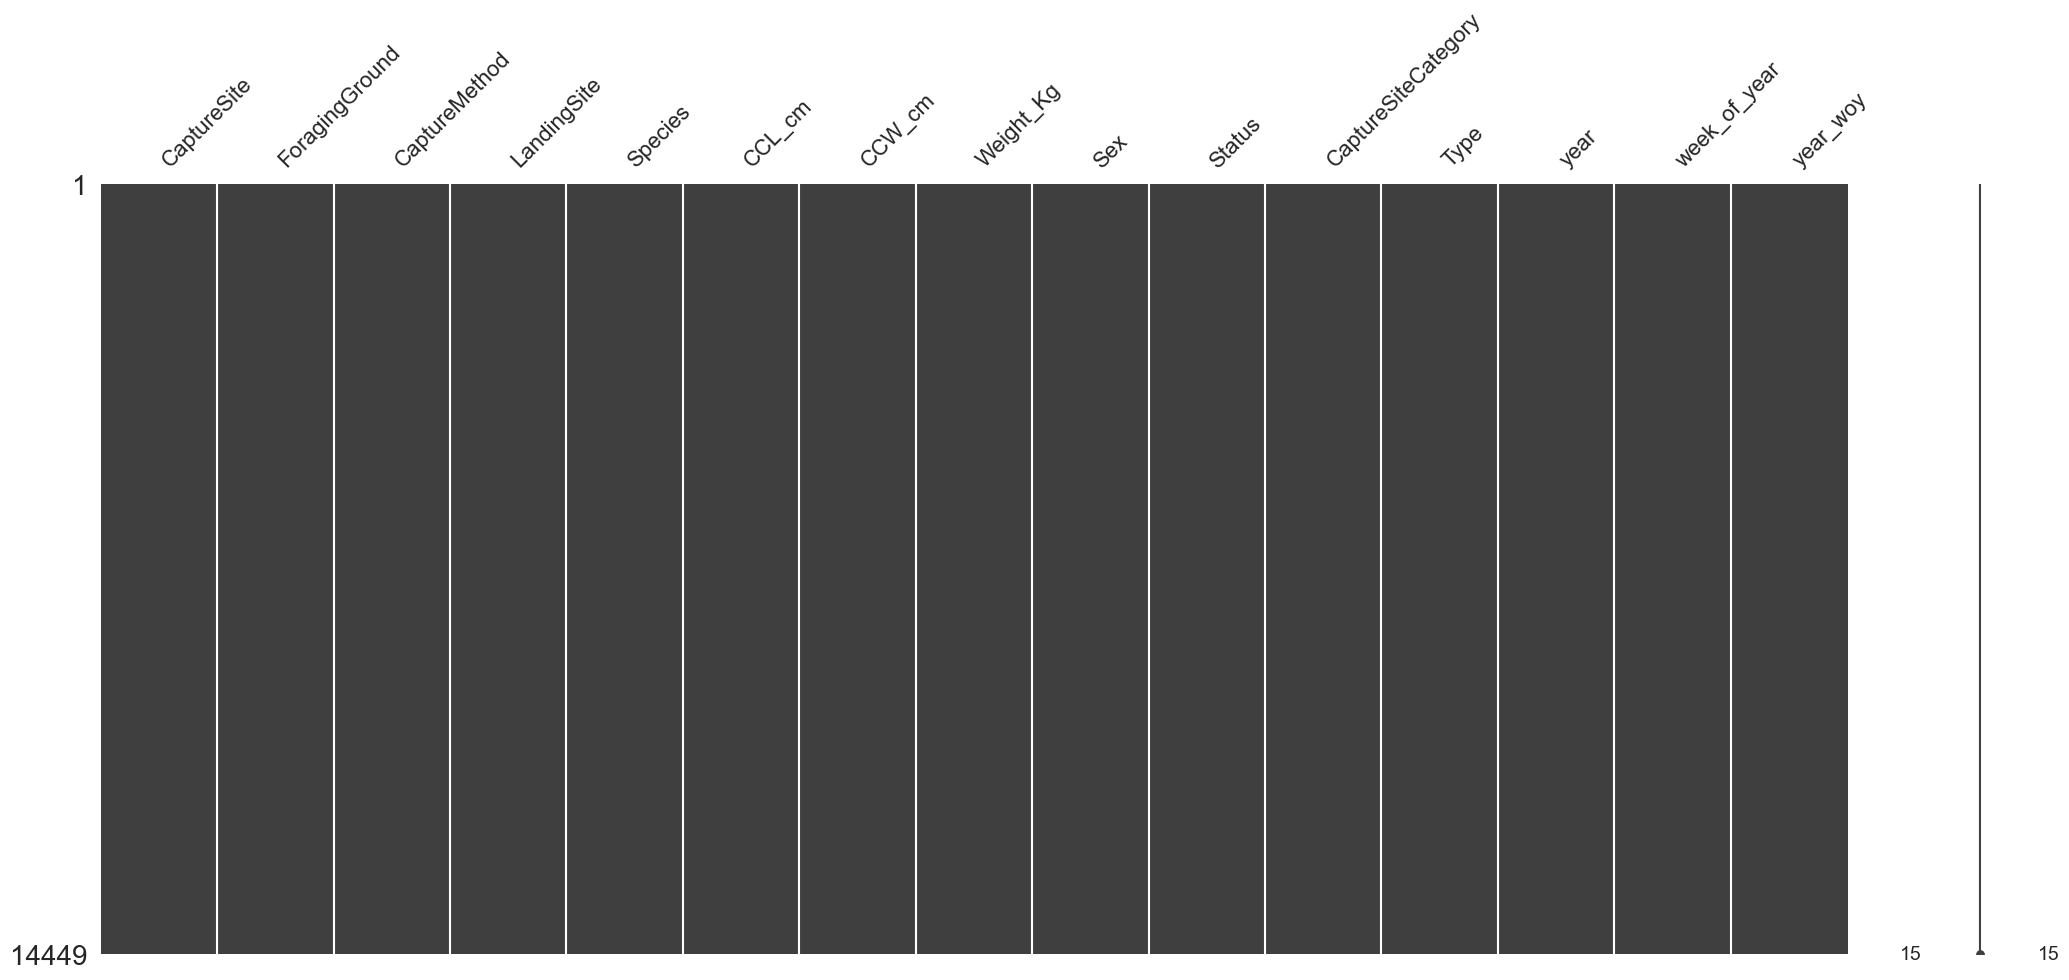

In [111]:
msno.matrix(X_train)

### X_test filling in missing values

In [112]:
#we have an outlier, so lets use the median to fill the missing values
X_test.Weight_Kg.fillna(X_test.Weight_Kg.median(), inplace=True)
#fill missing values of Sex with Unknown
X_test.Sex.fillna('Unknown', inplace=True)
X_test.Status.fillna('Not_Recorded', inplace=True)
#then fill in missing values with median per species
X_test.CCL_cm.fillna(X_test.groupby('Species').CCL_cm.transform('median'), inplace=True)
X_test.CCW_cm.fillna(X_test.groupby('Species').CCW_cm.transform('median'), inplace=True)

## Get dummies

In [113]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [114]:
"""feature_transformer = ColumnTransformer([
    ('one_hot_encoding', OneHotEncoder(sparse = False, handle_unknown = 'ignore'), features_not_numerical),
    ('Standard_Scaler', StandardScaler(), ['CCL_cm', 'CCW_cm', 'Weight_Kg']), 
], remainder='drop')

x_train_trans = feature_transformer.fit_transform(X_train)
x_test_trans = feature_transformer.transform(X_test)"""

"feature_transformer = ColumnTransformer([\n    ('one_hot_encoding', OneHotEncoder(sparse = False, handle_unknown = 'ignore'), features_not_numerical),\n    ('Standard_Scaler', StandardScaler(), ['CCL_cm', 'CCW_cm', 'Weight_Kg']), \n], remainder='drop')\n\nx_train_trans = feature_transformer.fit_transform(X_train)\nx_test_trans = feature_transformer.transform(X_test)"

In [115]:
# List of non-numeric columns to one-hot encode
features_not_numerical = ['CaptureSite', 'ForagingGround', 'CaptureMethod', 'LandingSite', 'Species', 'Sex', 'Status',
                          'CaptureSiteCategory', 'Type', 'year', 'week_of_year', 'year_woy']

# Create a ColumnTransformer
feature_transformer = ColumnTransformer([
    ('one_hot_encoding', OneHotEncoder(sparse=False, handle_unknown='ignore'), features_not_numerical),
    ('Standard_Scaler', StandardScaler(), ['CCL_cm', 'CCW_cm', 'Weight_Kg']),
], remainder='drop') # Use 'drop' for the remainder parameter to drop the non-numeric columns after encoding

# Create a pipeline to apply the transformation
pipeline = Pipeline([
    ('preprocessor', feature_transformer),
])

# Fit and transform the training data
x_train_trans = pipeline.fit_transform(X_train)

# Transform the test data using the same transformation
x_test_trans = pipeline.transform(X_test)


In [116]:
x_train_trans.shape


(14449, 1498)

# Baseline Model: DummyRegressor

In [117]:
#Baseline model on One-Hot encoded data
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

dummy_mean = DummyRegressor(strategy='mean')
dummy_mean.fit(x_train_trans, y_train)
y_pred1 = dummy_mean.predict(x_test_trans)

print('Dummy Regressor root mean squared error: {:.2f}'.format(mean_squared_error(y_test, y_pred1, squared=False)))

Dummy Regressor root mean squared error: 3.82


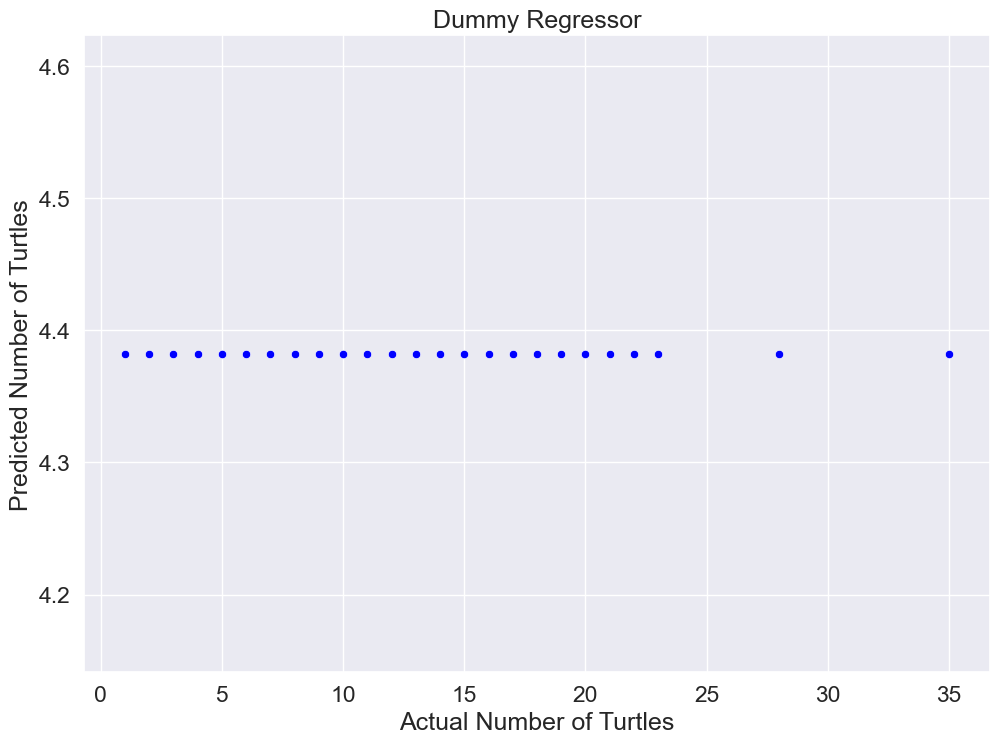

In [118]:
#vizualize baseline model: DummyRegressor

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.5)

sns.scatterplot(x=y_test, y=y_pred1, color='blue')
plt.xlabel('Actual Number of Turtles')
plt.ylabel('Predicted Number of Turtles')
plt.title('Dummy Regressor')
plt.show()


# Model 1: Random Forest

In [129]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create and train the Random Forest Regressor
random_forest_regressor = RandomForestRegressor(random_state=42)  # You can adjust hyperparameters here
random_forest_regressor.fit(x_train_trans, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_regressor.predict(x_test_trans)

# Evaluate the model using Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('Random Forest Regressor Root Mean Squared Error: {:.2f}'.format(mse_rf, squared=False))



Random Forest Regressor Root Mean Squared Error: 0.67


#### feature importance

In [120]:
# Convert the NumPy array to a pandas DataFrame with feature names
x_train_trans_df = pd.DataFrame(x_train_trans, columns=features)

# Now you can access the columns attribute
features = list(x_train_trans_df.columns)

# Continue with your feature importance calculation
fi = pd.DataFrame({'feature': features,
                   'importance': random_forest_regressor.feature_importances_}).\
                    sort_values('importance', ascending=False)
fi.head(10)


,feature,importance
966,Feature_967,0.090500
18,Feature_19,0.083926
7,Feature_8,0.061194
28,Feature_29,0.054151
970,Feature_971,0.045916
1188,Feature_1189,0.024919
974,Feature_975,0.019795
1120,Feature_1121,0.019250
967,Feature_968,0.018684
20,Feature_21,0.015067


#### hyperparameter tuning with RandomizedSearchCV

In [122]:
#define RSEED
RSEED = 42

In [130]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestRegressor(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'neg_mean_squared_error', cv = 3, 
                        n_iter = 20, verbose = 1, random_state=RSEED)

# Fit 
rs.fit(x_train_trans, y_train)
print(rs.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/Users/janicepelzer/Documents/neuefische/day28-Ninja-Turtles/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/janicepelzer/Documents/neuefische/day28-Ninja-Turtles/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/janicepelzer/Documents/neuefische/day28-Ninja-Turtles/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and w

{'n_estimators': 196, 'min_samples_split': 10, 'max_leaf_nodes': 49, 'max_features': 0.7, 'max_depth': 17, 'bootstrap': True}


In [125]:
best_model = rs.best_estimator_

In [126]:
n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')


Average number of nodes 35
Average maximum depth 9


In [131]:
y_pred_test_rs = best_model.predict(x_test_trans)
print("Random Forest Regressor after hyperparameter tuning RMSE::", round(np.sqrt(mean_squared_error(y_test, y_pred_test_rs,)), 3))

Random Forest Regressor after hyperparameter tuning RMSE:: 2.85


### next models: 
* Linear Regression
* Ridge and Lasso
* KNN neares neighbors


# Model: Linear Regression (won't use, bad RMSE)

In [132]:
#train model
linreg = LinearRegression()
linreg.fit(x_train_trans, y_train)
y_pred3 = linreg.predict(x_test_trans)
#print('Linear Regression root mean squared error: {:.2f}'.format(mean_squared_error(y_test, y_pred3, squared=False)))
print("Linear Regression RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred3)), 3))

Linear Regression RMSE: 984957622061.265


# Model: Logistic Regression (use or not use?)

In [ ]:
#train model
logreg = LogisticRegression()
logreg.fit(x_train_trans, y_train)
y_pred4 = logreg.predict(x_test_trans)
print('Logistic Regression root mean squared error: {:.2f}'.format(mean_squared_error(y_test, y_pred4, squared=False)))

Logistic Regression root mean squared error: 2.64


# Model 2: Ridege Regression

# Model 3: Lasso Regression

# Model 4: KNN nearest neighbors

In [ ]:
# KNNRegressor
from sklearn.neighbors import KNeighborsRegressor

# Create and train the KNN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust hyperparameters here
knn_regressor.fit(x_train_trans, y_train)
knn_y_pred = knn_regressor.predict(x_test_trans)

print('Logistic Regression root mean squared error: {:.2f}'.format(mean_squared_error(y_test, knn_y_pred, squared=False)))

Logistic Regression root mean squared error: 2.30


In [ ]:
#Hyperparameter tuning in KNNRegressor
from sklearn.model_selection import GridSearchCV

# Create a dictionary of hyperparameters to search
grid_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create a grid search object   
gs = GridSearchCV(
    KNeighborsRegressor(),  # The model to optimize
    grid_params,  # The hyperparameter space
    verbose=1,  # Verbosity: how much information to display
    cv=3,  # Number of cross-validation folds
    n_jobs=-1  # Number of parallel jobs (-1 means "all processors")
)

# Fit the model
gs.fit(x_train_trans, y_train)

# Get the best hyperparameters
print('Best hyperparameters:', gs.best_params_)
print('Best score:', gs.best_score_)
print('Best estimator:', gs.best_estimator_)
print('Best index:', gs.best_index_)
print('Scorer function:', gs.scorer_)
print('Number of folds:', gs.n_splits_)


Fitting 3 folds for each of 28 candidates, totalling 84 fits
Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best score: 0.7135538971562578
Best estimator: KNeighborsRegressor(metric='manhattan', weights='distance')
Best index: 17
Scorer function: <function _passthrough_scorer at 0x147c47560>
Number of folds: 3
Refit time: 0.07711100578308105


AttributeError: 'KNeighborsRegressor' object has no attribute 'classes_'

In [ ]:
# fir knn model with best parameters
knn_best_params = gs.best_params_

# Comparison of all models